In [ ]:
import pandas as pd

data = {
    'order_id':[1,2,3,4],
    'amount' :[50,200,150,75],
    'category' :['a','b','c','d']
}

df = pd.DataFrame(data)

print(df)

filtered_df = df[df['amount'] > 100]
filtered_df = df[df['amount'] > 100].copy()
print(filtered_df)

#total_discounted_revenue = filtered_df['amount'].sum()



filtered_df.loc[:,'discounted_amount'] = filtered_df['amount'].apply(lambda x: x * 0.9)
total_discounted_revenue = filtered_df['amount'].sum()
print(total_discounted_revenue)


   order_id  amount category
0         1      50        a
1         2     200        b
2         3     150        c
3         4      75        d
   order_id  amount category
1         2     200        b
2         3     150        c
350


In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

exercise = sb.load_dataset('exercise') #loading the data set
print(exercise)

print("\ninfo about exercise :") #information
print("=" *  30)
print(exercise.info())

print("\ndescription of exersice data :") #stastictical values of the data
print("=" *  30)
print(exercise.describe())

print("\nnull value count:") #null values count
print("=" *  30)
exercise.isnull().sum()

    Unnamed: 0  id     diet  pulse    time     kind
0            0   1  low fat     85   1 min     rest
1            1   1  low fat     85  15 min     rest
2            2   1  low fat     88  30 min     rest
3            3   2  low fat     90   1 min     rest
4            4   2  low fat     92  15 min     rest
..         ...  ..      ...    ...     ...      ...
85          85  29   no fat    135  15 min  running
86          86  29   no fat    130  30 min  running
87          87  30   no fat     99   1 min  running
88          88  30   no fat    111  15 min  running
89          89  30   no fat    150  30 min  running

[90 rows x 6 columns]

info about exercise :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  90 non-null     int64   
 1   id          90 non-null     int64   
 2   diet        90 non-null     category
 3   pulse       9

,0
Unnamed: 0,0
id,0
diet,0
pulse,0
time,0
kind,0


In [ ]:
runners = exercise[exercise['kind'] == "rest"]
print(runners)

runners_highpulse = exercise[(exercise['kind'] == "running") & (exercise['pulse'] > 100)]
print("\n")
print('=' *30 )
print(runners_highpulse)

    Unnamed: 0  id     diet  pulse    time  kind  kind_encoded
0            0   1  low fat     85   1 min  rest             0
1            1   1  low fat     85  15 min  rest             0
2            2   1  low fat     88  30 min  rest             0
3            3   2  low fat     90   1 min  rest             0
4            4   2  low fat     92  15 min  rest             0
5            5   2  low fat     93  30 min  rest             0
6            6   3  low fat     97   1 min  rest             0
7            7   3  low fat     97  15 min  rest             0
8            8   3  low fat     94  30 min  rest             0
9            9   4  low fat     80   1 min  rest             0
10          10   4  low fat     82  15 min  rest             0
11          11   4  low fat     83  30 min  rest             0
12          12   5  low fat     91   1 min  rest             0
13          13   5  low fat     92  15 min  rest             0
14          14   5  low fat     91  30 min  rest       

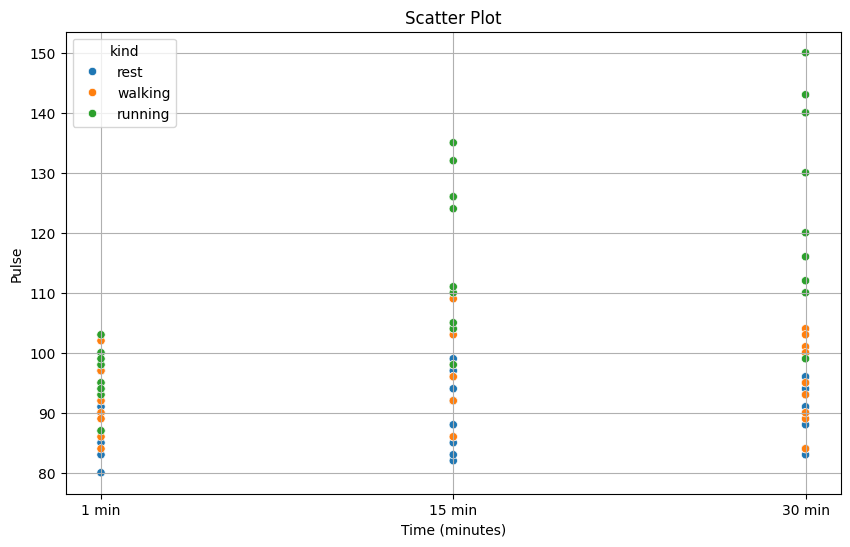

In [ ]:
plt.figure(figsize=(10, 6)) # Set the figure size
sb.scatterplot(data=exercise, x='time', y='pulse', hue='kind') # Creating scatter plot
plt.title('Scatter Plot') # Set title
plt.xlabel('Time (minutes)') # x-axis label
plt.ylabel('Pulse') #y-axis label
plt.grid(True) # Add grid
plt.show()


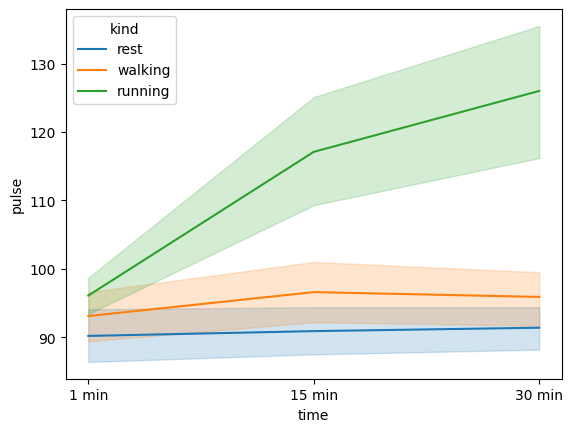

In [ ]:
sb.lineplot(data=exercise, x='time', y='pulse', hue='kind')
plt.show()

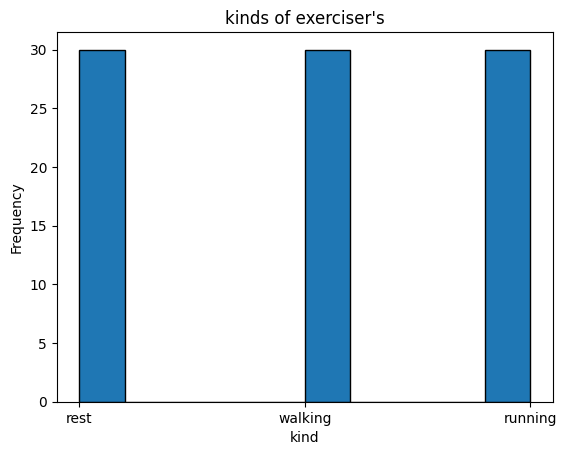

<Figure size 500x600 with 0 Axes>

In [ ]:
plt.hist(exercise['kind'], bins=10, edgecolor='black')
plt.xlabel('kind')
plt.ylabel('Frequency')
plt.title("kinds of exerciser's")
plt.figure(figsize=(5,6))
plt.show()

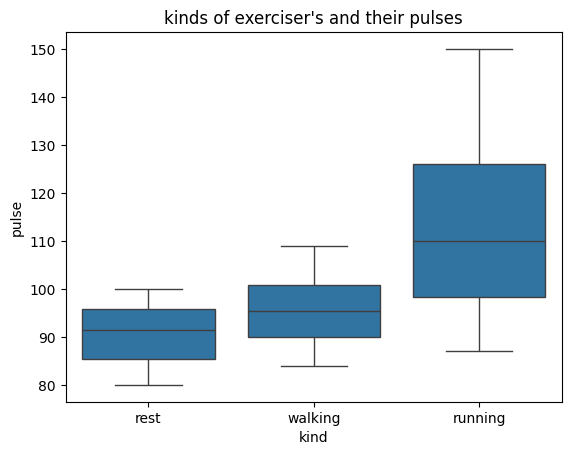

<Figure size 500x600 with 0 Axes>

In [ ]:
sb.boxplot(x='kind', y='pulse' , data=exercise)
plt.title("kinds of exerciser's and their pulses")
plt.figure(figsize=(5,6))
#plt.xlabel('kind')
#plt.ylabel('pulse')
plt.show()

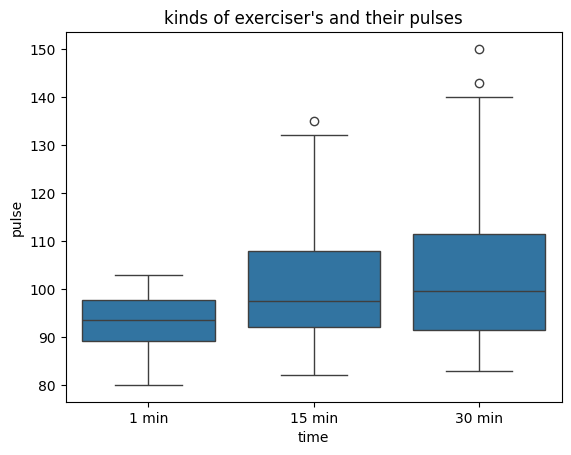

<Figure size 500x600 with 0 Axes>

In [ ]:
sb.boxplot(x='time', y='pulse' , data=exercise)
plt.title("kinds of exerciser's and their pulses")
plt.figure(figsize=(5,6))
#plt.xlabel('kind')
#plt.ylabel('pulse')
plt.show()

Outliers based on pulse:
     Unnamed: 0  id     diet  pulse    time     kind  kind_encoded
70          70  24  low fat    132  15 min  running             1
76          76  26   no fat    126  15 min  running             1
77          77  26   no fat    143  30 min  running             1
79          79  27   no fat    126  15 min  running             1
80          80  27   no fat    140  30 min  running             1
82          82  28   no fat    124  15 min  running             1
83          83  28   no fat    140  30 min  running             1
85          85  29   no fat    135  15 min  running             1
86          86  29   no fat    130  30 min  running             1
89          89  30   no fat    150  30 min  running             1
Total outliers: 10


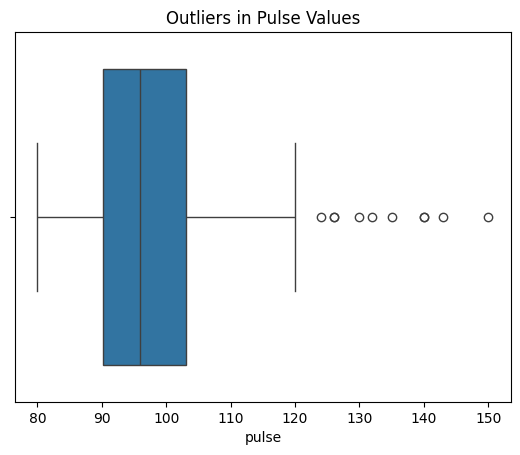

In [ ]:
'''Q1 = exercise['pulse'].quantile(0.25)
Q3 = exercise['pulse'].quantile(0.75)
IQR = Q3 - Q1'''
Q1 = exercise['pulse'].quantile(0.25)
Q3 = exercise['pulse'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = exercise[(exercise['pulse'] < lower_bound) | (exercise['pulse'] > upper_bound)]
print("Outliers based on pulse:\n", outliers)
print(f"Total outliers: {len(outliers)}")


sb.boxplot(x=exercise['pulse'])
plt.title("Outliers in Pulse Values")
plt.show()


Correlation Matrix:
              Unnamed: 0        id     pulse  kind_encoded
Unnamed: 0      1.000000  0.999506  0.688489      0.471434
id              0.999506  1.000000  0.679012      0.471667
pulse           0.688489  0.679012  1.000000      0.120650
kind_encoded    0.471434  0.471667  0.120650      1.000000


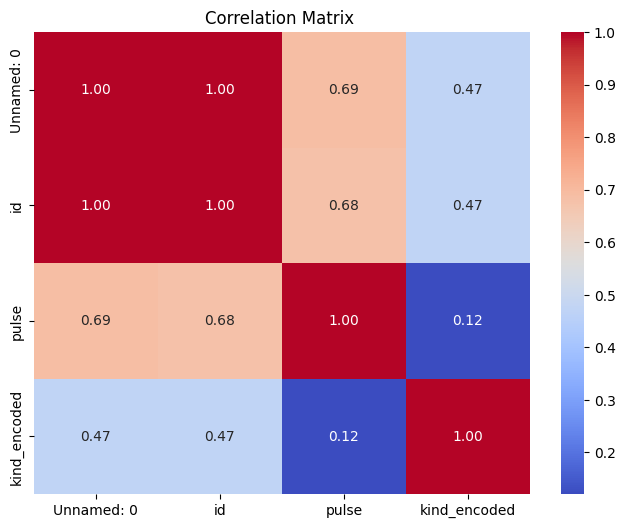

In [ ]:
numerical_exercise = exercise.select_dtypes(include=['number']) #only numerical values for correlation

correlation_matrix = numerical_exercise.corr()
print("\nCorrelation Matrix:")
print("=" * 30)
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") #annot shows values in matrix cell and #cmap used for color
plt.title("Correlation Matrix ")
plt.show()